<a href="https://colab.research.google.com/github/KatiaItzelCortes/EDP/blob/main/Series%20de%20fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor

Nuestra función esta definida por:


$$
f(x) =
\begin{cases}
0 & \text{si } -2 \leq x < 0 \\
2-x
 & \text{si } 0 \leq x \leq 2
\end{cases}
$$



Obteniendo los términos para la serie de Fourier:
$$a_0=1$$
De igual forma:
$$a_n=\frac{-2((-1)^n-1)}{(n\pi)^2}$$
Por último:
$$b_n=\frac{2(-1))^n}{n\pi}$$

Con eso, obtenemos la siguiente serie:


$$g(x)=\frac{1}{2}+\sum_{n=1}^{\infty}(\frac{-2((-1)^n-1)}{(n\pi)^2} \cos(\frac{n\pi(x)}{2})+\frac{2}{n\pi}  \sin(\frac{n\pi(x)}{2})).$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

pylab se usa para crear graficos

Para empezar, graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if i  < len(x)/2:
          y[i] = 0 * x[i]
        else:
          y[i] = 2 - x[i]
    return y

define una funcion llamada recta e inicia un bucle con un rango en especifico

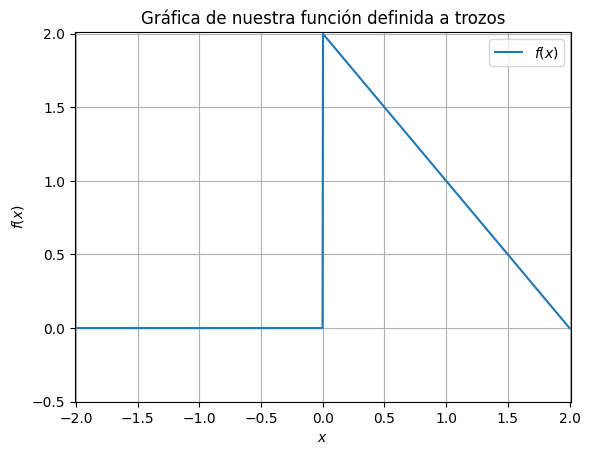

In [ ]:
x = linspace(-2,2,1000)
f = recta(x)
plot(x,f,label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Gráfica de nuestra función definida a trozos")
xlim([-2.01,2.01]),ylim([-0.5,2.01]),grid(),legend()
show()

va a crear una grafica, especifica la fumcion, el nombre de la grafica, añade nombre y un limite a los ejes.(Graficamos la condicion inicial cuando t = 0, por lo que es una linea recta)

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (((-1)**n - 1 )/n**2)*cos(n*pi*x/2)+(-1)**n/n*sin(n*pi*x/2)
    return (2/pi**2)*f+1/2

Definimos una función que va a calcular la serie de fourier y le damos un intermalo

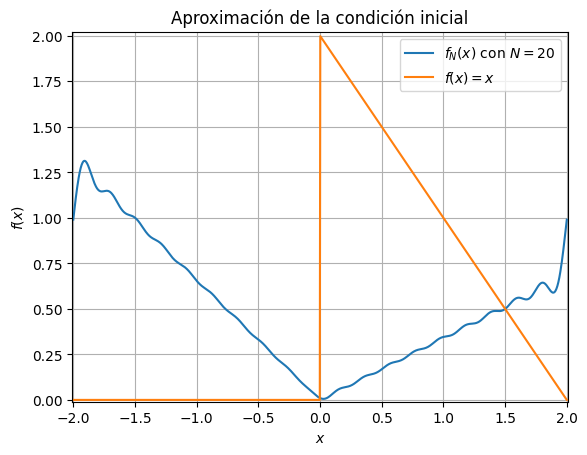

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-2.01,2.01]),ylim([-0.01,2.02]),grid(),legend()
show()

llama a la funcióm que se define arriba y graficamos la serie de fourier con 20 armonicos sobre la grafica de condicion inicial y entre mas aumentamos los armonicos la grafica se va acercando mas a la recta exepto en la discontinuidad.

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

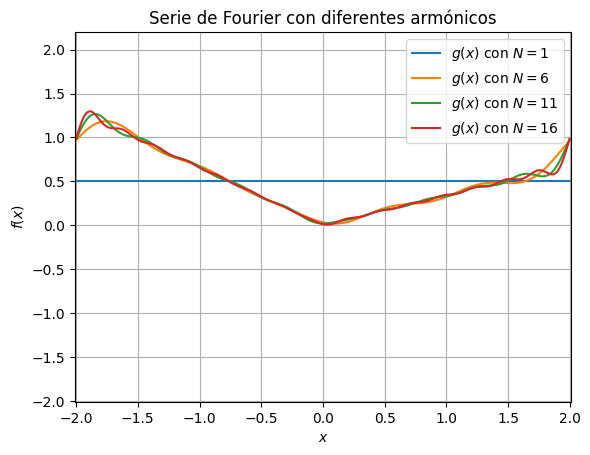

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$g(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Serie de Fourier con diferentes armónicos")
xlim([-2.01,2.01]),ylim([-2.01,2.2]),grid(),legend()
show()

podemos ver en la grafica como va mejorando la aproximación aumentando los terminos en la serie de fourier

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.